# 5. Findings

**Jordan Miranda**

**Course: BrainStation Data Science**

**Previous Notebook: 4. Modelling**

# Introduction

Now that we've selected a final model and attached the model's cluster labels to our dataset we can begin to dive into what the profiles of our four types (1 per cluster label) of players look like from a metrics standpoint.

To tie this back to our original business case, by identifying these four profiles for which a player could fit into, this will allow clubs with differing objectives to find the players they're looking for. Some clubs are financially strong and wish to challenge for trophies - these clubs will want players that overachieve and are ready to play at the highest level before they purchase them. Other clubs may be development focused and wish to acquire young, unproven players for cheap fees, develop the player, and then sell them to another wealthier club for a profit after they've improved. 

With our clustering labels, the goal is to pre-screen these players for clubs and provide them with a pool of players they should look at dependent on what their objective is (as shown by the examples above).

With that being said, let's read in our complete dataset with cluster labels and begin to uncover what the profiles of our 4 player types look like.

To get started, we'll import our standard tools and read in our csv.

In [1]:
# importing our standard tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

In [2]:
# reading in our final csv with cluster labels attached, providing our index column
stats = pd.read_csv("FormattedCapstoneData/clustered_player_stats.csv", index_col=[0])
stats

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90,Cluster
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.50,19.50,2000.0,20.50,11.50,1024.50,2.50,1.00,2.50,0.00,0.00,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.00,0.0,0.00,0.56,49.47,52.88,0.00,0.28,3
Aaron-Cresswell,2017.00,27.00,1989.0,32.00,31.29,2772.14,1.14,3.14,1.14,0.00,0.00,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.00,0.0,0.00,0.97,85.95,103.79,0.00,0.73,1
Aaron-Hickey,2020.00,18.00,2002.0,11.00,10.00,758.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.91,68.91,42.11,0.00,0.49,1
Aaron-Hughes,2011.50,31.50,1979.0,23.50,22.50,2033.50,0.25,0.00,0.25,0.00,0.00,0.75,0.00,0.01,0.00,0.01,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.94,85.30,65.46,0.00,0.00,1
Aaron-Hunt,2013.67,26.67,1986.0,21.56,17.67,1557.78,3.78,2.56,2.56,1.22,1.56,1.56,0.11,0.21,0.12,0.32,0.16,0.27,0.0,1.00,1.0,0.00,0.0,0.00,0.76,67.12,59.57,0.79,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,2016.14,27.14,1989.0,18.29,17.57,1551.29,1.14,0.71,1.14,0.00,0.00,6.57,0.86,0.06,0.04,0.10,0.06,0.10,0.0,0.29,0.0,0.71,0.0,0.29,0.96,84.94,57.07,0.00,0.41,1
Zouheir-Dhaouadi,2012.00,24.00,1988.0,8.00,1.00,235.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.0,1.00,0.0,0.00,1.0,0.00,0.12,29.38,9.79,0.00,0.00,3
Zubi,2013.00,20.00,1993.0,1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.00,0.0,0.00,0.00,6.00,0.30,0.00,0.50,2


# Identifying Player Profiles Through Cluster Labels

We've successfully read in our csv file and can see based on the last column `Cluster` that the cluster labels from our final model are attached. We can now begin to uncover insights on our player profiles by performing a `.groupby()` on the `Cluster` column. We will start by looking at high-level differences feature-by-feature for each cluster label.

## Grouping by Cluster Label - Means

While means aren't the best measure of a cluster's profile, for a high-level analysis it is suitable. Later we will look into the distributions of each feature for each cluster to either confirm or modify the initial assumptions made here.

In [4]:
# grouping by cluster and looking at the average for each label
# transposing for better readability
stats.groupby("Cluster").mean().round(2).T

Cluster,0,1,2,3
Year,2015.09,2014.81,2015.22,2014.97
Age,26.60,26.14,21.88,24.41
Born,1988.14,1988.32,1992.99,1990.19
MP,26.46,21.36,6.10,16.07
Starts,20.87,17.88,2.63,8.39
Min,1849.89,1589.62,266.80,803.50
Gls,7.05,0.97,0.13,2.55
Ast,3.27,1.07,0.15,1.16
G-PK,5.86,0.94,0.13,2.46
PK,1.19,0.03,0.00,0.09


Looking at a table of numbers usually isn't the most visually appealing, let's take some of our columns and visualize them through bar charts.

<Figure size 432x288 with 0 Axes>

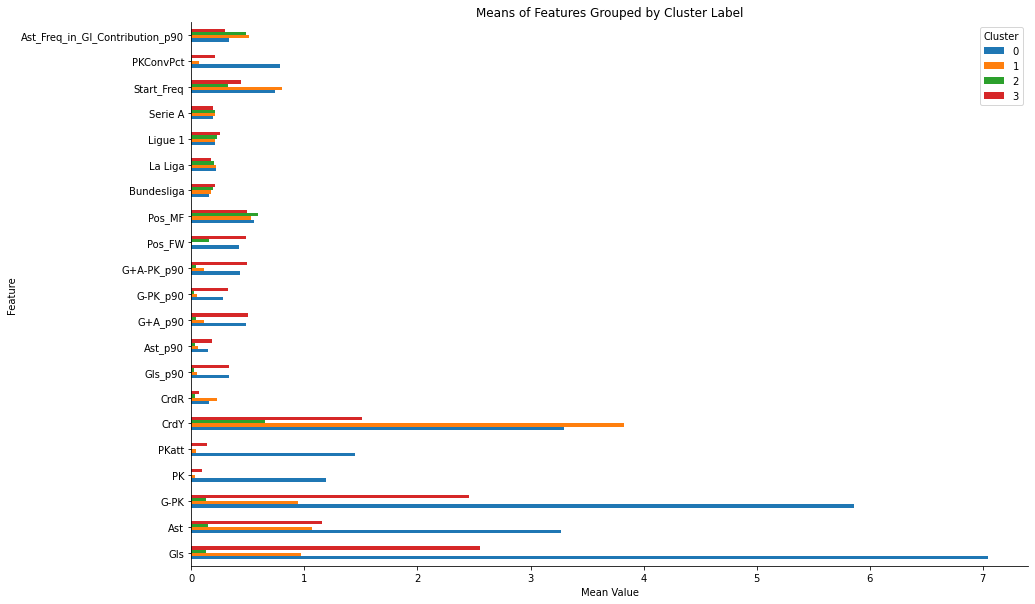

In [10]:
# lets visualize some of the differences in features
# we'll get rid of the columns that don't contain values average values between 0-10 for now
# to allow for better visualization of the columns that do fall within that value range
plt.figure()
stats.drop(columns=["Year", "Born", "Min", "Avg_Mins_pGame", "Mins_to_Age", "Starts", "MP", "Age"]).groupby("Cluster").mean().round(2).T.plot(kind="barh", figsize=(15, 10))

# labels, titles, and cleaning
plt.title("Means of Features Grouped by Cluster Label")
plt.xlabel("Mean Value")
plt.ylabel("Feature")
sns.despine()
plt.show()

Lastly, let's get a breakdown of the percentage of players in each cluster.

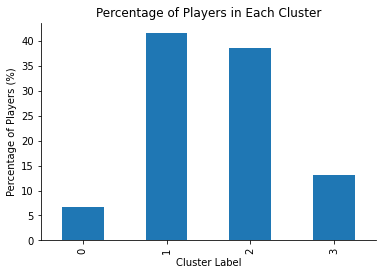

In [20]:
# grouping by cluster label, counting each player (taking "Year" column to count)
# then dividing by the total number of rows in our dataset to get normalized values
# and turning them into a bar chart
plt.figure()
((stats.groupby("Cluster")["Year"].count()/stats.shape[0])*100).plot(kind="bar")

# labels, titles, and cleaning
plt.title("Percentage of Players in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Percentage of Players (%)")
sns.despine()
plt.show()

From the dataframe and charts above there are a few initial insights we can gather about the different player types. We will go by cluster label and breakdown our findings.

### Cluster 0 - Overachievers

From both the visualizations above and the `.mean()` DataFrame we can see that cluster label 0 seems to be the "overachievers" of the group. There are a few differences in this cluster we notice immediately compared to the others:
- This cluster has an extremely high number of goals, assists and their `_p90` metrics on average tower over cluster labels 1 and 2.
- Based on their high average `Pos_FW` & `Pos_MF` values, these players are typically played as forwards or possibly in offensive midfielder positions, greatly contributing to their team's attacks.
- Players in this cluster are excellent at taking penalties with an average `PKConvPct` of 78% - well clear of the other clusters. 
- With an average value closer to 0 than 1 in our `Ast_Freq_in_Gl_Contribution_p90` feature, this tells players in this cluster typically are the goalscorers when they do contribute to a team goal.
- As expected being the prolific contributors they are, their `Start_Freq` and `Avg_Mins_pGame` are the second highest value out of the clusters.
- Despite having the highest average `Age`, these players don't show signs of slowing down as they have the highest `Mins_to_Age` ratio.

From these insights, it seems quite clear that cluster 0 are the overachievers who are at the top of the game (at least within the domain of attacking as evidenced by their positions). With just around 7% of players being in this cluster label, they are the cream of the crop and are extremely hard to come by.

### Cluster 1 - Reliable Performers

Based on the number of players in this cluster, it can be seen as a mixed-bag of players. However, there are still some insights here that can help us uncover what type of players fall in this cluster:
- Players in this cluster are likely more defense-oriented as the average `Pos_MF` value is 53% and the `Pos_FW` value is 1%, meaning that our reference column `Pos_DF` makes up the remaining 46%. Players in this cluster are typically fielded as defenders or midfielders in a more defensive role. 
- The point above further reinforced by this cluster's `CrdY` and `CrdR`. They're the highest out of all the clusters meaning these players receive more cards on average, a common tendency for defensive players.
- Given their `Age`, `MP`, `Avg_Mins_pGame`, `Mins_to_Age`, and `Start_Freq` values, these players have established themselves over their careers as players who deserve their spot in their team's starting 11.
- Players in this cluster are more likely to assist when they contribute to their team's goals. They have the highest `Ast_Freq_in_Gl_Contribution_p90` out of all the clusters at 51%. However, as their score falls right in the middle between 0 and 1 we know that these players can still find themselves in the right spot at the right time, contributing with a goal every now and then.

As mentioned above this cluster can be considered a mixed-bag of players, however the one pattern we observed with high confidence evidenced by the mean values is that this cluster of players could be considered in the overall top 50% of players. These players have solidified their spot in their team's lineup and perform to a high-standard (relative to their teams) week in and week out.

### Cluster 2 - Unproven Youth 

This cluster contains the second largest percentage of players in our dataset, with approximately 38% of players classified under cluster label 2. Again due to the number of players in this cluster it can also be considered a mixed-bag however we do still seem some key differences within this cluster.

- The average `Age` of players in this cluster is 21.8 years old, well below any of the other clusters. 
- Players in this cluster have yet to be given a chance to showcase their talents as they have played very few matches, started even less, and based on their `Avg_Mins_pGame` (35 minutes) don't get much time to prove their talent when they are on the field.
- These players are likely still considered unreliable or untested by their coaching staff as their `Start_Freq` is quite low, starting only in one-third of the games they play.
- Players in this cluster come from all positions but primarily play in the midfield and defense positions. (`Pos_MF` value of 0.53, and a `Pos_FW` of 0.16, meaning `Pos_DF`'s value is 0.31)

The theme in this cluster label is the *lack* of high numbers for players in this cluster. As evidenced by their young age, low matches played, and low starting frequency, players in this cluster are fighting to prove to their coaching staff that they deserve playing time compared to the previous two cluster labels who have earned their spots.

### Cluster 3 - Promising Young Breakout Talent

Our last cluster, cluster 3 contains the second lowest percentage of players in our dataset. This cluster label makes up approximately 13-15% of all the players in our dataset. Based on the mean values in some of these features we can see a clear separation between this cluster and the others, notably cluster 0 and cluster 2. Let's look at some key indicators to tell us what player profile this cluster contains.

- In comparison to clusters 0 and 2, the age, matches played, starts, and minutes played for cluster 3 falls between the other 2 clusters mentioned.
- Players in this cluster are heavily focused on attack. This cluster has the highest `Pos_FW` value, and when combined with the `Pos_MF` value, leaves only 0.03 for the `Pos_DF` feature. 
- Players in this cluster perform relatively well given their age and situation. This is evidenced by comparing their `_p90` metrics to those of players in cluster 0 which are considered the overachievers. The values between these two clusters in the `_p90` columns are very close and in some cases, cluster 3 even outperforms cluster 0!
- We can see that teams & coaching staff that have players who fall under cluster 3's label understand the talent this player has, as they've began to breakaway from the unproven players in cluster 2. This is reinforced by the values in the `Start_Freq`, `Avg_Mins_pGame`, and `Mins_to_Age` column being higher than those in cluster 2 but not quite at the level of clusters 0 and 1.
- Players in this cluster are quite often the goalscorers for their team. They have the lowest `Ast_Freq_in_Gl_Contribution_p90` out of all the cluster labels.

From the insights above, there is a strong case to be made that this cluster can be considered the "breakout talent" cluster. Players in this cluster are typically younger than the average proven player but have shown early signs of very promising talent. Coaches have rewarded these types of players with more faith, recognition, and game time when compared to the unproven youth in cluster 2. If players in this cluster can maintain or improve their talents as they age, it's possible that they could be moved to cluster 0 - the overachievers - further on in their career.

## Distributions of Features by Cluster

Now that we've got a rough idea of what the player profile of each cluster label looks like, let's plot out the distributions of our features by each label to either confirm, modify, or reject the assumptions we've made for the player profiles.

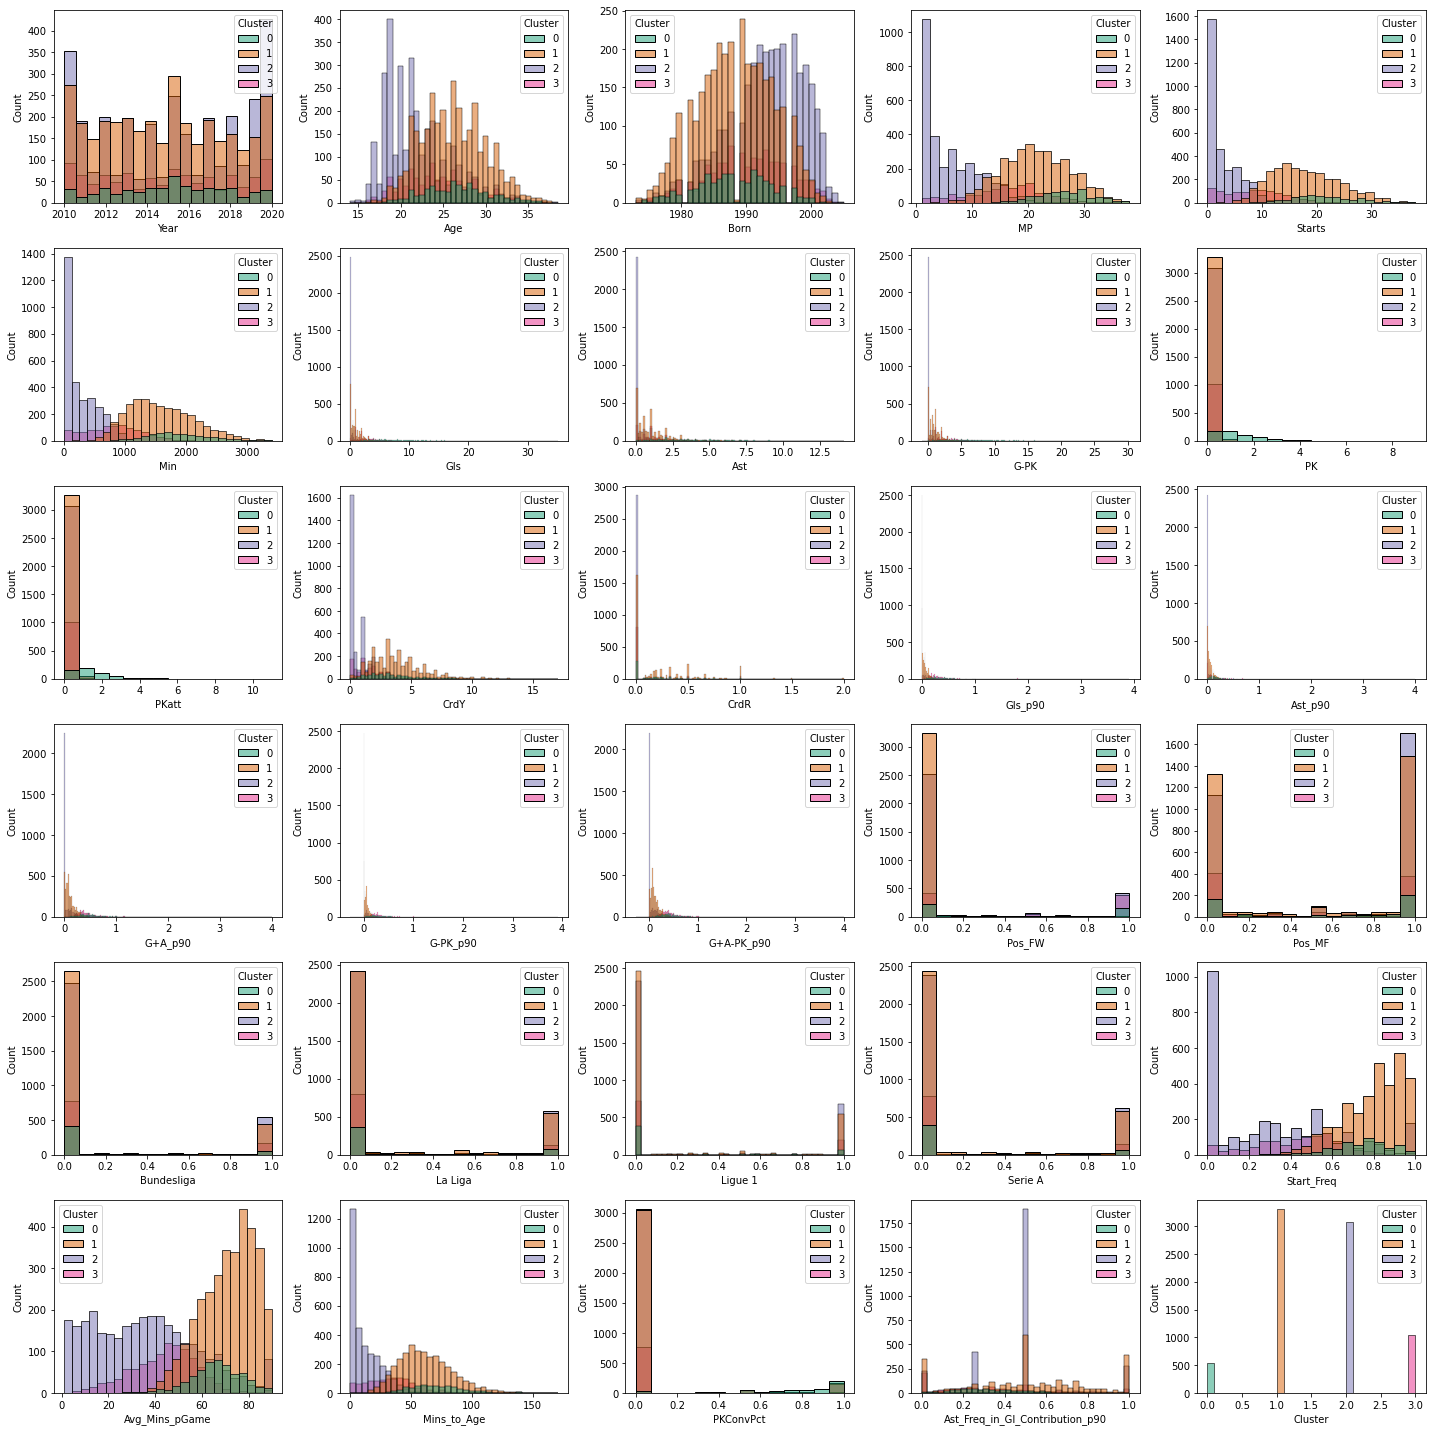

In [32]:
plt.subplots (6, 5, figsize=(20, 20))

for index, column in enumerate(stats):
    
    # visualize distribution for each column
    plt.subplot(6,5, index+1)
    sns.histplot(x=column, hue="Cluster", data=stats, palette="Dark2")

plt.tight_layout()
plt.savefig("Feature Distributions for Each Cluster - Findings.png")
plt.show()


Unfortunately the distributions of the goal-scoring metrics and the `_p90` metrics are quite incomprehensible due to outliers with high values. However in the `G+A_p90` chart we can see (if we look very closely) that the unproven youth of cluster 2 are all sitting on or near 0. Cluster 1 - the reliable performers - start with many players clustered near 0 but do have a fair amount that move closer to 1 as the number of players tapers off. We can also see that for clusters 0 and 3, those with the highest means for this feature, had their distribution's appear almost normal with a mean centered around the 0.5 value.

Looking at the distributions for the features `Age`, `MP`, `Starts`, `Min`, and `Mins_to_Age` we can see that each respective cluster's distribution seems to be the same across these features. We see that unproven youth players (cluster 2) are heavily centered towards 0 as they haven't been given much playing time. Cluster 1 - the reliable performers - gives us an almost completely normal distribution although in some of the listed features it is slightly right-skewed. Then in clusters 0 and 3 we can see that their distribution's are also somewhat normal with their means being located on the right tail-end of cluster 1's normal distribution. If we consider cluster 1's to be the normal distribution of most players in the league, the means of clusters 0 & 3's being on the right tail-end of cluster 1's normal distribution tell us that these players are on their way to becoming outliers as the number of standard deviations increases away from cluster 1's mean.

Lastly, looking at `Start_Freq` and `Avg_Mins_pGame` we can see that the reliable performers in cluster 1 have a normal distribution but with a negative skew due to a higher mean and a chubbier right-side tail. Clusters 0 & 3 have both have what look to be normal distributions but this time their means are lower than cluster 1's. Lastly, we can see that our assumption on youth players not receiving as many minutes (`Avg_Mins_pGame`) as the other clusters was correct however the distribution is much more uniform then normal. It seems these youth players could play anywhere from 0-40 minutes average per game. Due to the lack of central tendency in this feature's distribution we can't say for certain which value is most frequent.

Based on the distributions of our features by cluster we can see that our initial assumptions on the profiles for our cluster labels were for the most part correct. 

# Conclusion

With our dataset from our previous notebook (***4. Modelling***) which contained all of our players and the averages of their features with our final model's cluster label attached, we sought out in this notebook to understand what the profiles of our cluster labels looked like. To do this we analyzed the feature means and distributions for each cluster label to help us create the four player profiles corresponding to the four clustered groups. After anaylzing the data we developed four player profiles. They are as follows:

- **0 - Overachievers**: Incredibly rare, high caliber players have impact the game immensely.
- **1 - Reliable Performers**: Top 50% of players, have solidified themselves and their position within their team.
- **2 - Unproven Youth**: Young players with raw talent that need fostering and development.
- **3 - Promising Young Breakout Talent**: Young players who've begun to develop at the professional level ahead of their age curve and show early signs of becoming strong assets in any team.

With these player profiles in mind we can now take our findings with us from this notebook into our final report where we will create and present the business use-case for these player labels and why they can help football clubs in their player scouting efforts.

## Next Steps / Future Iterations

In the next steps of this project there are two main things that can be improved on or implemented to round out the work completed so far.
- **Creating a Player Recommender system**: Using sklearn's `NearestNeighbors`, an unsupervised learner to create a recommendation system based on the shortest euclidean distance from a user-given player to their nearest neighbour within the cluster would allow the model to give more specific recommendations. As it stands currently, this model can only tell the user (a club for example) to search through an entire cluster of players that have the same cluster label as the player they're seeking to replace or mimic. Currently, this is a very broad search and would only slightly reduce the workload club scouts would have to perform as the model as it is currently just helps to shortens their list of potential targets.

- **Inclusion of more specific stats, both offensive and defensive**: Having only the most basic stats did not allow us to differentiate upon playstyles, which was the original goal with our modelling. Instead we ended up identifying profiles of players that greater reflect their skill level than their playstyle. This mainly came down to the lack of granular metrics used to measure our players. This was noticeable in our current model as players that were in defense-oriented positions had what appeared to be poor stats (no goals and little assists) but realistically they are measured on much different metrics such as tackles won, pass interceptions, etc. Inclusion of more specific metrics could've allowed for better identification of a player's playstyle rather than their skill level.